In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().values.any()

False

In [ ]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [ ]:
fraud_data = data[data['Class']==1]
normal_data = data[data['Class']==0]
print(fraud_data.shape)
print(normal_data.shape)

(492, 31)
(284315, 31)


In [ ]:
ratio = len(fraud_data)/len(normal_data)
print(ratio)

0.0017304750013189597


In [ ]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.hist(figsize=(20,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


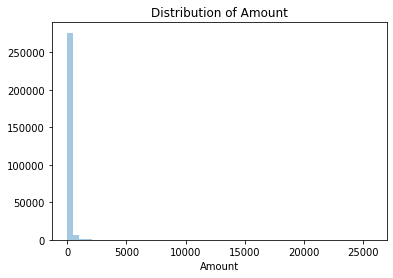

In [ ]:
fig = sns.distplot(data['Amount'], kde=False)
plt.title("Distribution of Amount")
plt.show()

In [ ]:
data['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [ ]:
vars = ['Time', 'Class']
temp_data = normal_data[vars]
temp_data.head()

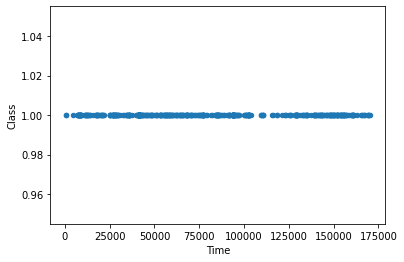

In [ ]:
temp_data.plot.scatter(x='Time',y='Class')

In [ ]:
vars = ['Time', 'Class']
temp_data = fraud_data[vars]
temp_data.head()

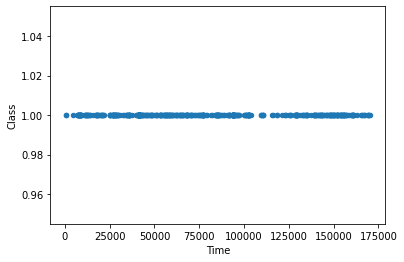

In [ ]:
temp_data.plot.scatter(x='Time',y='Class')

In [ ]:
data = data.drop('Time', axis=1)

In [ ]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

# Corelation Matrix

In [ ]:
#Checking for multicolinearity between the features
corr_matrix = data.corr()
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corr_matrix, vmax = .8, square = True) 
plt.show()

# Building the model

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
features = data.drop('Class', axis=1)
target = data[['Class']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.7,random_state=5)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(199364, 29)
(199364, 1)
(85443, 29)
(85443, 1)


In [ ]:
# Oversampling Technique - (Synthetic minority oversampling technique) 
# Just the number of minority data points is increased 
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 42)
# x_train_new, y_train_new = sm.fit_sample(x_train, y_train.values.ravel())

# Undersampling the dataset

In [ ]:
class_val = data['Class'].value_counts()
print(f"Number of samples for each class :- \n {class_val}")
non_fraud = class_val[0]
fraud = class_val[1]

Number of samples for each class :- 
 0    284315
1       492
Name: Class, dtype: int64


In [ ]:
# equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = data[data.Class == 0].index
fraud_indices = np.array(data[data['Class'] == 1].index)

# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

In [ ]:
# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = data.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
x_train_sample, x_test_sample, y_train_sample, y_test_sample = 
train_test_split(x_undersample_data, y_undersample_data, train_size=0.8, random_state=0)

# Training the data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_sample,y_train_sample.values.ravel())

acc_score = dt_model.score(x_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset:-  {acc_score}')

# predict result using test dataset
dt_predictions = dt_model.predict(x_test_sample)

# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, dt_predictions)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, dt_predictions)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, dt_predictions)}")

Accuracy of model on test dataset:-  0.9238578680203046
Confusion Matrix :- 
 [[97  9]
 [ 6 85]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.90      0.93      0.92        91

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

AROC score :- 
 0.9245801368442879


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_sample,y_train_sample.values.ravel())

acc_score = dt_model.score(x_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset:-  {acc_score}')

# predict result using test dataset
log_predictions = lr_model.predict(x_test_sample)

# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, log_predictions)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, log_predictions)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, log_predictions)}")

Accuracy of model on test dataset:-  0.9238578680203046
Confusion Matrix :- 
 [[105   1]
 [  5  86]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.99      0.95      0.97        91

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

AROC score :- 
 0.9678104913953971


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model.fit(x_train_sample, y_train_sample.values.ravel())

acc_score = rf_model.score(x_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset:-  {acc_score}')

# predict result using test dataset
rf_predictions = rf_model.predict(x_test_sample)

# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, rf_predictions)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, rf_predictions)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, rf_predictions)}")

Accuracy of model on test dataset:-  0.9593908629441624
Confusion Matrix :- 
 [[105   1]
 [  7  84]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       106
           1       0.99      0.92      0.95        91

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

AROC score :- 
 0.9568214804063861


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train_sample,y_train_sample.values.ravel())

acc_score = nb_model.score(x_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset:-  {acc_score}')

# predict result using test dataset
nb_predictions = nb_model.predict(x_test_sample)

# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, nb_predictions)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, nb_predictions)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, nb_predictions)}")

Accuracy of model on test dataset:-  0.9137055837563451
Confusion Matrix :- 
 [[102   4]
 [ 13  78]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       106
           1       0.95      0.86      0.90        91

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

AROC score :- 
 0.9097035040431267


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(x_train_sample, y_train_sample.values.ravel())

acc_score = kn_model.score(x_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset:-  {acc_score}')

# predict result using test dataset
kn_predictions = kn_model.predict(x_test_sample)

# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, kn_predictions)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, kn_predictions)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, kn_predictions)}")

Accuracy of model on test dataset:-  0.9137055837563451
Confusion Matrix :- 
 [[98  8]
 [ 9 82]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.90      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

AROC score :- 
 0.9128136014928467


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier